In [1]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import researchpy as rp
from scipy.stats import skew
from scipy.stats import kurtosistest
# Establecer tamaño fijo de gráficas
plt.rcParams["figure.figsize"] = (10,8)
from scipy.stats import levene


# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [2]:
df=pd.read_csv('../datos/salarios_bajos.csv', index_col=0)
df.head(2) #Hacemos una vista previa de nuestro DataFrame

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-Time,Data Scientist,79833,DE,0,DE,L
5,2020,Entry-Level,Full-Time,Data Analyst,72000,US,100,US,L


### Normalidad (ya la deberíais haber evaluado)

Como hemos visto en el ejercicio de pair programming 2, nuestra variable respuesta no presenta una distribución normal

### Homogeneidad de varianzas

Antes que nada, localizamos nuestras variables numéricas y categóricas, para poder hacer el estudio de manera separada.

In [3]:
numericas = df.select_dtypes(include=np.number)
numericas.head(2)

,work_year,salary_in_usd,remote_ratio
0,2020,79833,0
5,2020,72000,100


Hacemos la representación gráfica de las variables numéricas para evaluar la homogeneidad de las varianzas

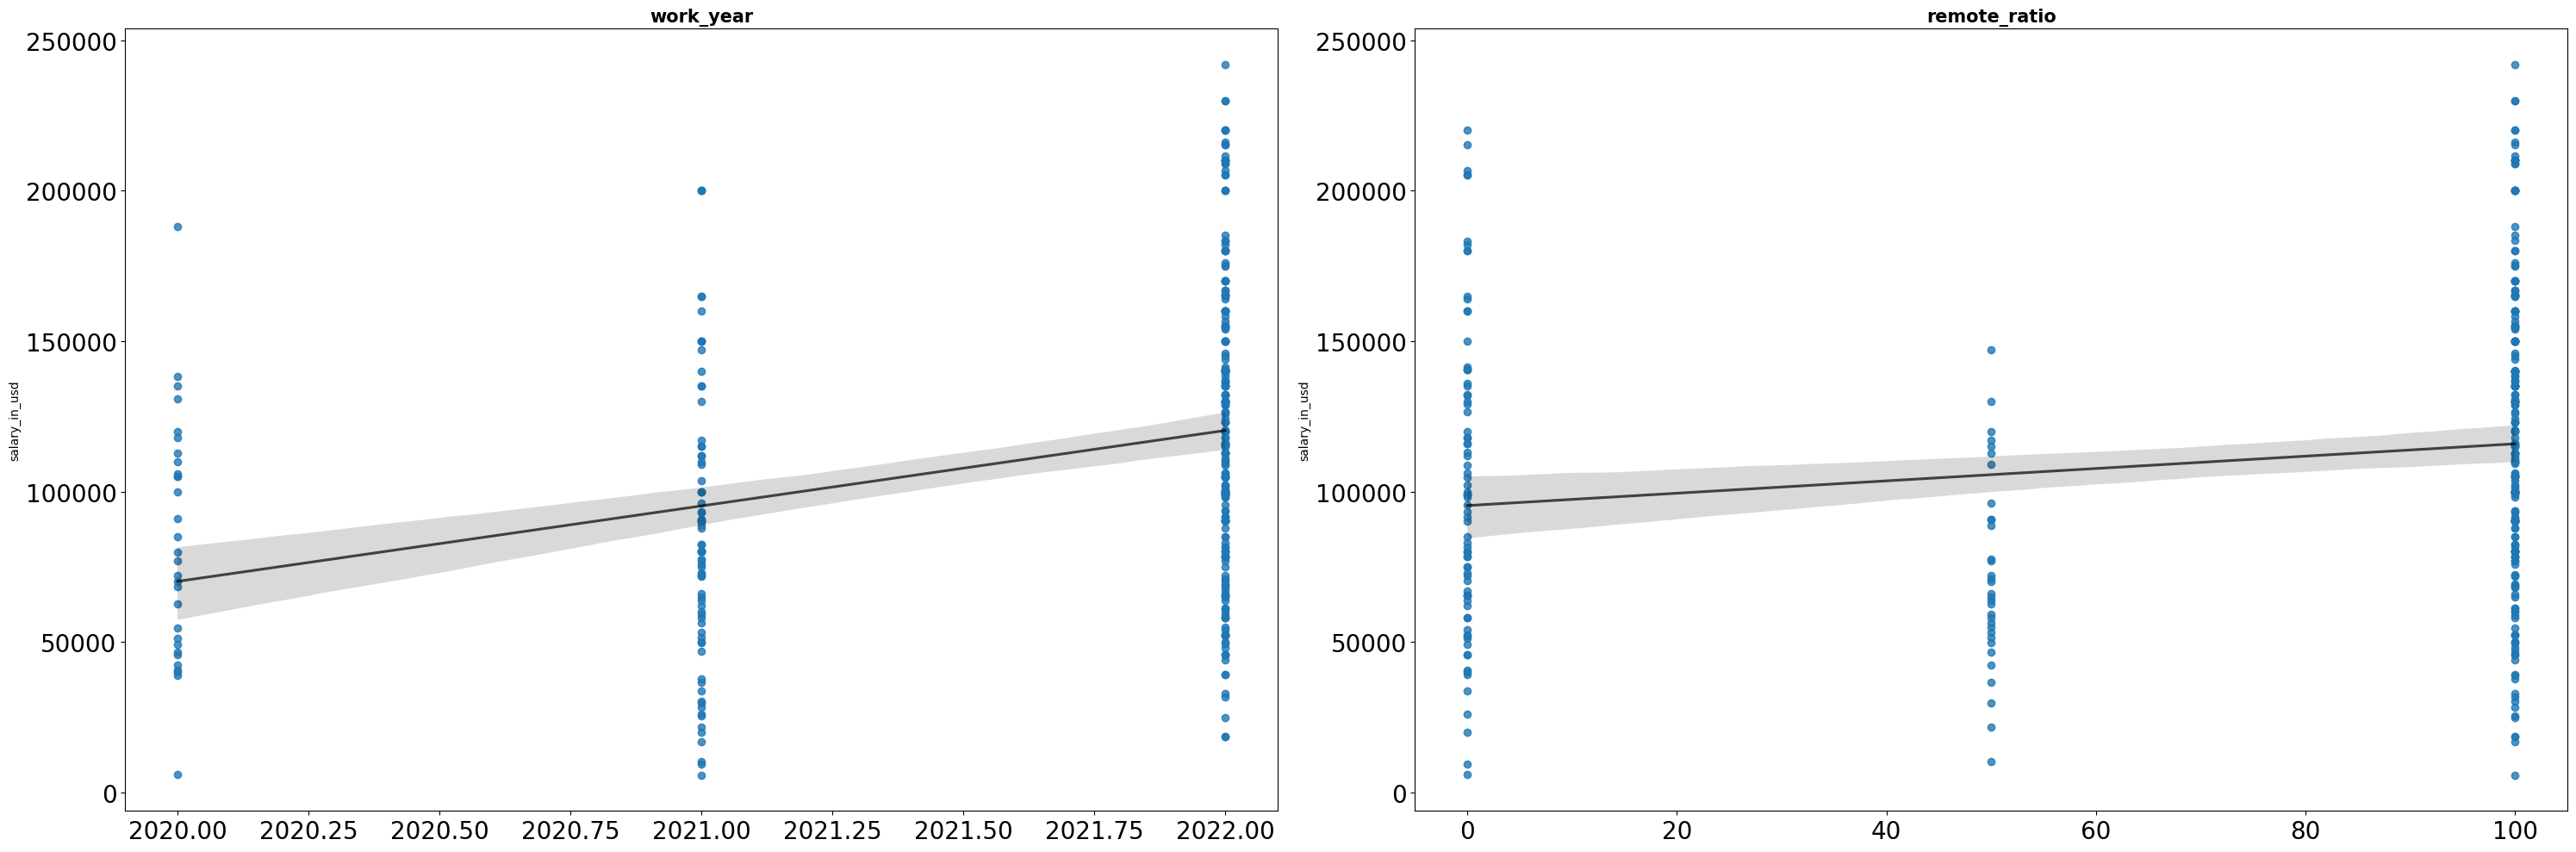

In [4]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop('salary_in_usd', axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'salary_in_usd',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

Como podemos ver el el gráfico, estas variables que están como numéricas, son, en realidad, categóricas. En los gráficos se puede ver de forma muy clara que solo ocupan 3 determinados valores. 
De esta manera, hacemos un astype para convertirlas en categoricas:

In [5]:
df['work_year'] = df['work_year'].astype('category')
df['work_year']

0      2020
5      2020
8      2020
10     2020
11     2020
       ... 
601    2022
602    2022
603    2022
604    2022
605    2022
Name: work_year, Length: 334, dtype: category
Categories (3, int64): [2020, 2021, 2022]

In [6]:
df['remote_ratio'] = df['remote_ratio'].astype('category')
df['remote_ratio']

0        0
5      100
8      100
10       0
11       0
      ... 
601      0
602    100
603    100
604      0
605    100
Name: remote_ratio, Length: 334, dtype: category
Categories (3, int64): [0, 50, 100]

In [7]:
df.dtypes

work_year             category
experience_level        object
employment_type         object
job_title               object
salary_in_usd            int64
employee_residence      object
remote_ratio          category
company_location        object
company_size            object
dtype: object

En este caso, consideramos que no tiene sentido hacer el cálculo analítico estas variables como numéricas ya que no son de este tipo.

In [8]:
categoricas = df.select_dtypes(include='object')
categoricas.head(2)

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,Mid-Level,Full-Time,Data Scientist,DE,DE,L
5,Entry-Level,Full-Time,Data Analyst,US,US,L


Hacemos la representación gráfica para las variables de tipo object:

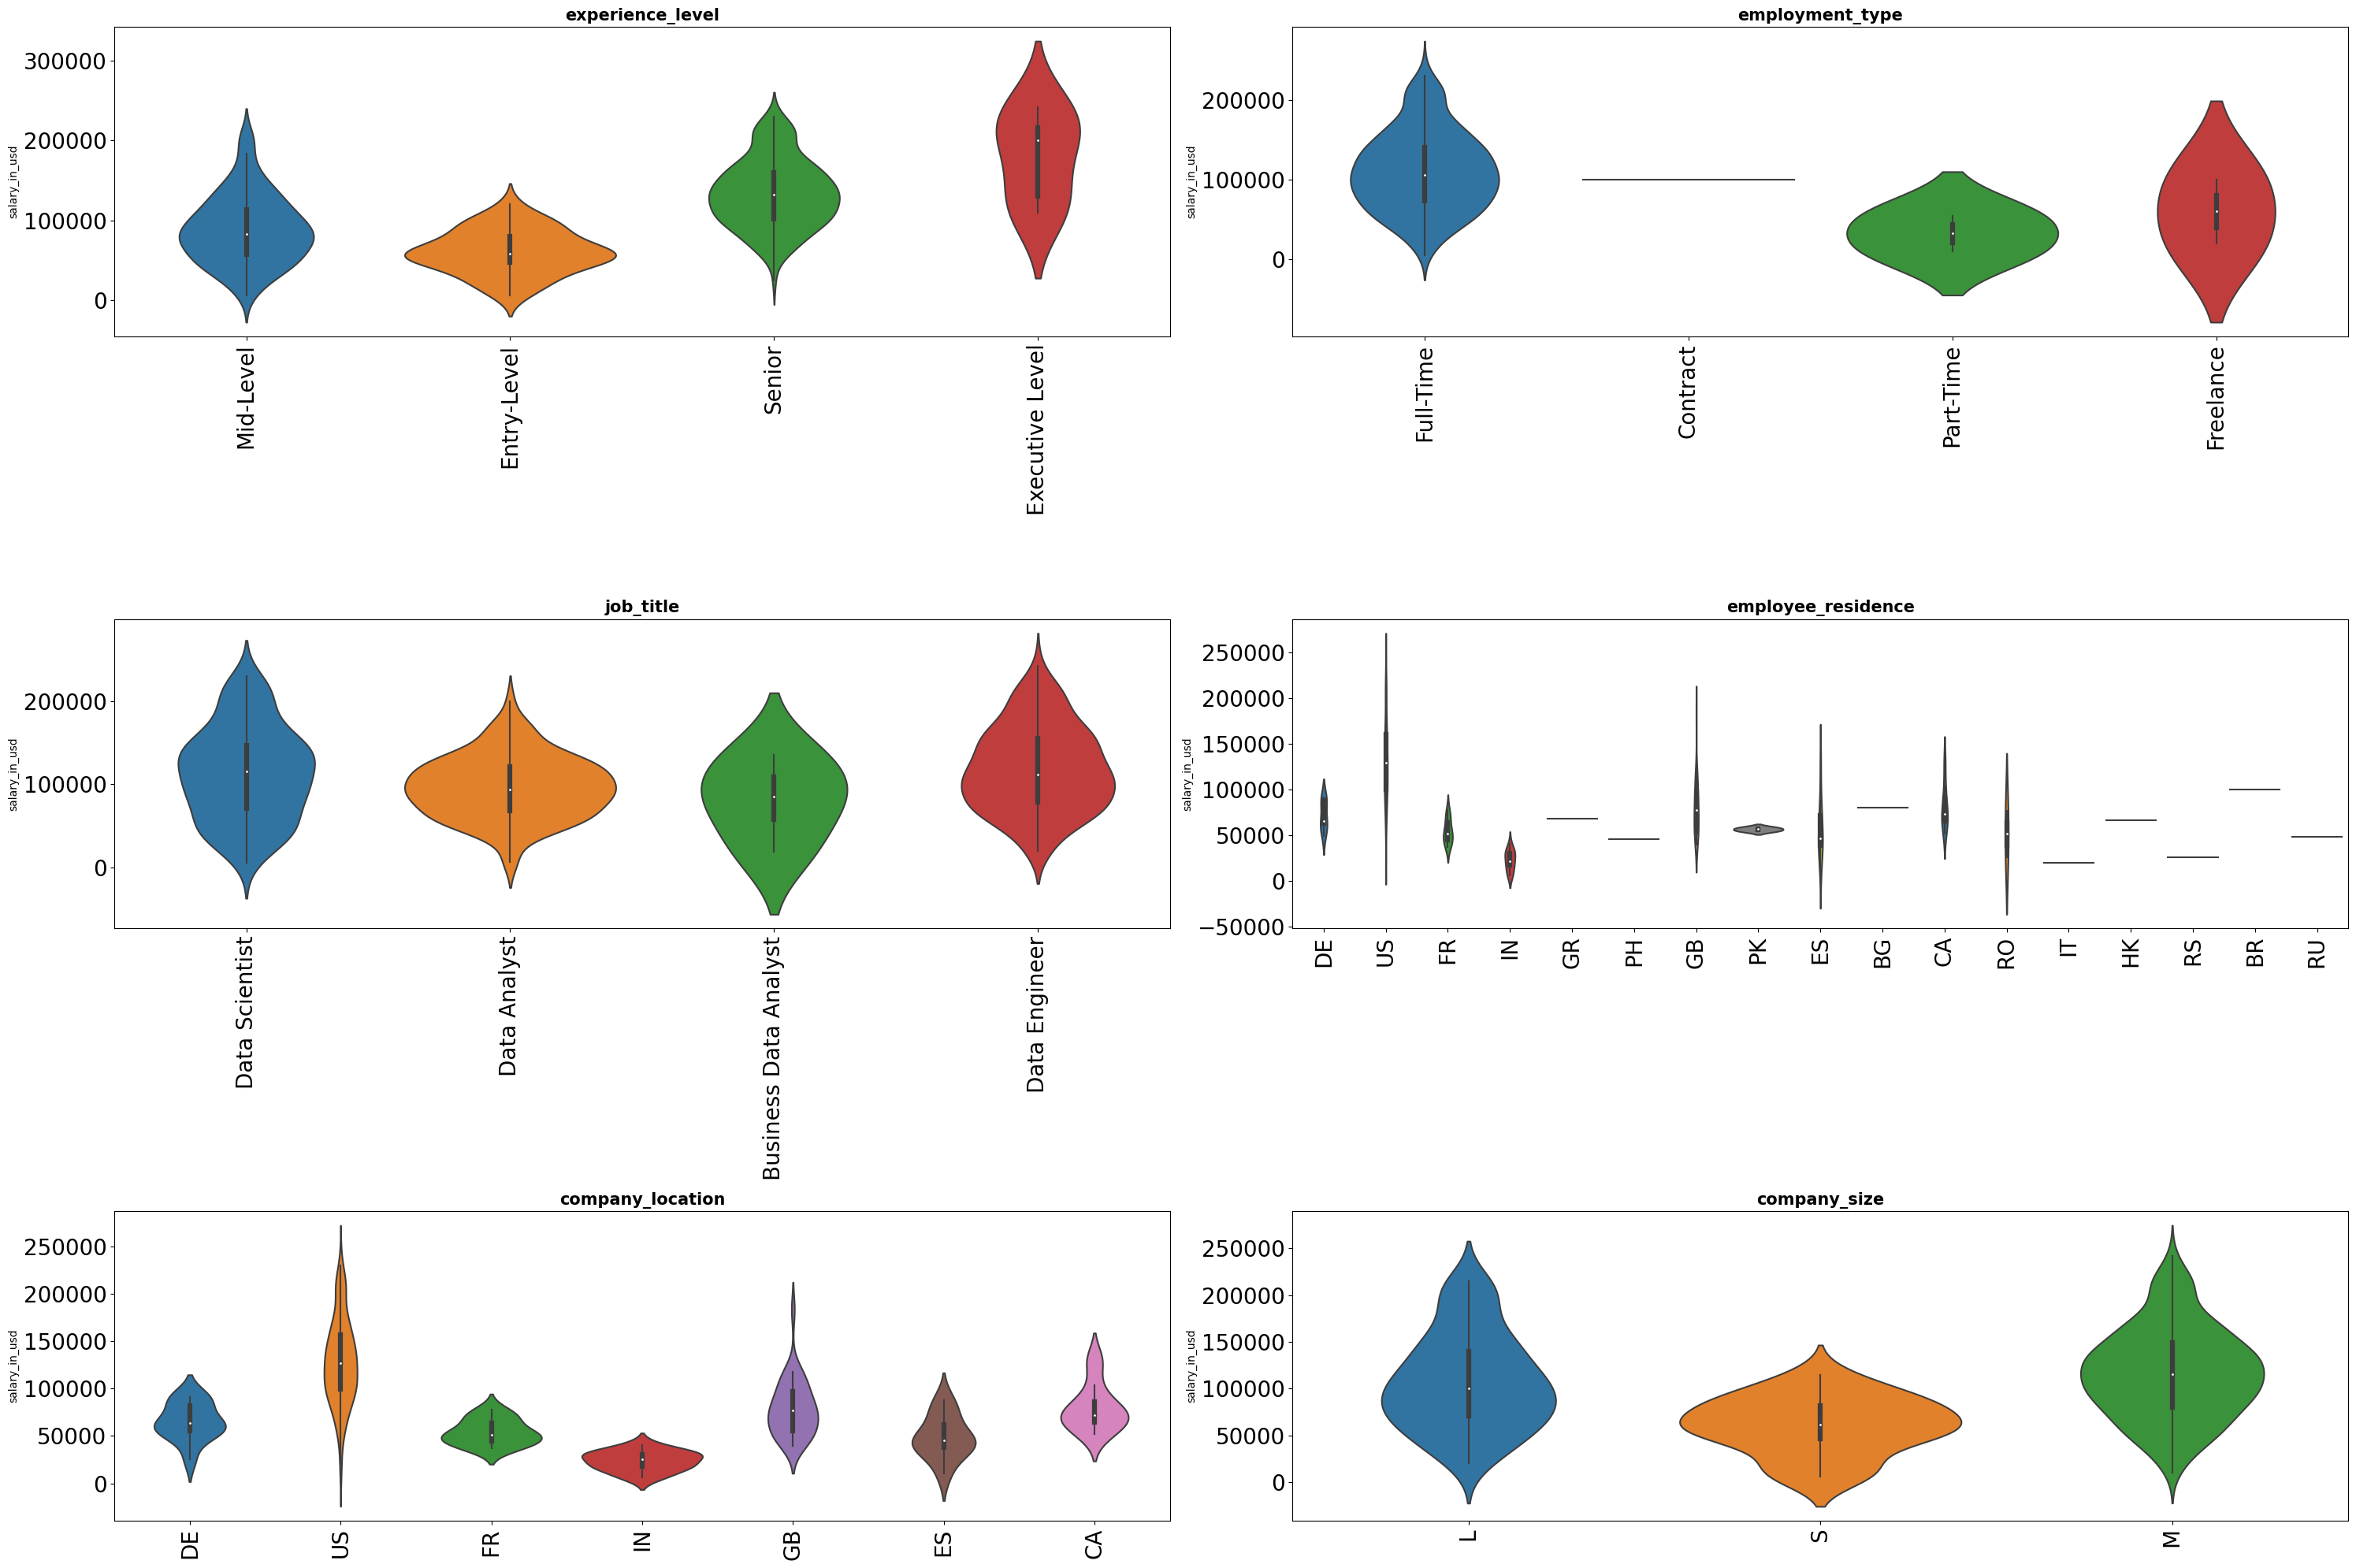

In [10]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 20))

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_object = df.select_dtypes(include = 'object')
columnas_object = columnas_object.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_object): 
    sns.violinplot(
        x = colum,
        y = 'salary_in_usd',
        data = df,
        palette = 'tab10',
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")

    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 90)

    
    # ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
    fig.tight_layout();